# La computación simbólica trata con la computación de objetos matemáticos de manera simbólica
## Esto significa que los objetos son representados de manera exacta, no aproximada y las expresiones matemáticas con variables no evaluadas, se dejan en forma simbólica
# Por ejemplo:

In [1]:
# Si deseamos calcular la raíz cuadrada de un número, podemos usar la función de la biblioteca math:
import math
print("El valor de la raíz cuadrada de 9 es:",math.sqrt(9))

El valor de la raíz cuadrada de 9 es: 3.0


### 9 es un cuadrado perfecto, por lo tanto obtuvimos una respuesta precisa, pero si queremos calcular la raíz cuadrada de un número que no es cuadrado perfecto


In [2]:
math.sqrt(8)

2.8284271247461903

### Obtenemos el valor 2.82842712475, que no es exactamente la raíz cuadrada de 8, sino una aproximación. El verdadero valor de la raíz cuadrada de 8 no puede ser representada con un número de decimales finitos, pues es irracional.
### Si quisiéramos hacer un análisis más profundo, por ejemplo $$ \sqrt{8} = \sqrt{4*2} = 2\sqrt{2} $$ No se podría deducir fácilmente esto a partir de la aproximación numérica que obtuvimos anteriormente

### Ahí es donde entra en juego la computación simbólica. En un caso como el de la raíz cuadrada de números que no son cuadrados perfectos un sistema como SymPy los deja como símbolos sin evaluar por defecto

In [3]:
import sympy
sympy.init_printing(use_unicode=True) # esto es sólo para que el output se vea bonito
print(sympy.sqrt(3))
sympy.sqrt(8)

sqrt(3)


### SymPy también sirve para computar expresiones con variables utilizando símbolos
### Se puede definir una expresión simbólica, por ejemplo $$ x + 2y $$

In [4]:
x, y = sympy.symbols('x y')
expr = x + 2*y
print(expr)
print(expr + 1)
print(expr - x)

x + 2*y
x + 2*y + 1
2*y


In [5]:
x * expr# Ojo la simplificación (falta de) que hace

### En vez de hacer $ x^2 + 2xy $ lo dejó como $ x (x+2y) $
### Esto porque a menos de que sean simplificaciones obvias (como $ x - x $) , sympy no va a simplificar sin que el programador se lo diga explícitamente

In [6]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr # expandido


In [7]:
factor(expanded_expr)

# SymPy puede simplificar expresiones, computar derivadas e integrales, límites, resolver ecuaciones, trabajar con matrices, etc, etc.

In [8]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
print ("-------- derivada ---------")
print(diff(sin(x)*exp(x), x)) # sin (x) * e^x
print ("-------- integral ---------") # e^x*sin(x)+e^x*cos(x)
print(integrate(exp(x)*sin(x) + exp(x)*cos(x), x))
print ("-------- integral rango infinito ---------") # sin (x^2) de -infinito a +infinito
print(integrate(sin(x**2), (x, -oo, oo)))
print ("-------- límite ---------") # de sin(x)/x cuando x --> 0
print(limit(sin(x)/x, x, 0))
print ("-------- solución ecuación ---------") # x^2 - 2 = 0
print(solve(x**2 - 2, x))
print ("-------- ecuación diferencial ---------") # y'' − y = e^t.
y = Function('y')
print((dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))))


-------- derivada ---------
exp(x)*sin(x) + exp(x)*cos(x)
-------- integral ---------
exp(x)*sin(x)
-------- integral rango infinito ---------
sqrt(2)*sqrt(pi)/2
-------- límite ---------
1
-------- solución ecuación ---------
[-sqrt(2), sqrt(2)]
-------- ecuación diferencial ---------
Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))


In [9]:
y = Function('y')
(dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t)))

#### Encontrar los autovalores(valores propios) de la matriz 
$$ \begin{matrix} 1 & 2 \\ 2 & 2 \end{matrix} $$

In [10]:
Matrix([[1, 2], [2, 2]]).eigenvals()

# Algunas operaciones básicas que se pueden hacer en sympy
- Substitución: Permite evaluar la función en un punto 

In [11]:
from sympy import *
x, y, z = symbols("x y z")
print("----------- Substitución -----------")
expr = cos(x) + sin(y)
expr.subs({x:pi, y: 1})

----------- Substitución -----------


- SymPy-ficar: Convierte una expresión en forma de string a una expresión de SymPy (no confundir con "simplyfy")


In [12]:
print("----------- SymPyfy -----------")
string_normal = "integrate(x**2 + 3*x - 1/2, x)"
expr = sympify(string_normal)
expr # lo imprime como expresión de SymPy

----------- SymPyfy -----------


- $\textbf{evalf}$ evalúa la expresión y la expresa como un número tipo float
- Se le puede indicar la cantidad de dígitos que se desee, por defecto pondrá 15 dígitos de precisión
- Se puede combinar con subs para sustituir en una función

In [13]:
expr = (sqrt(9))
print("----------- Raíz de 8 -----------")
print(expr.evalf())
print("----------- 100 dígitos de π -----------")
print(pi.evalf(100))
print("----------- Combinación de subs con evalf -----------")
expr = cos(2*x)
print(expr.evalf(subs={x: 2.4}))

----------- Raíz de 8 -----------
3.00000000000000
----------- 100 dígitos de π -----------
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
----------- Combinación de subs con evalf -----------
0.0874989834394464


In [14]:
pi.evalf(10000)

# Si se necesita hacer una evaluación en varios puntos, existen maneras eficientes de hacerlo
### Aunque estas evaluaciones en cantidades grandes de puntos es más eficiente realizarlas en SciPy/NumPy

- lambdify convierte los nombres de variables de SymPy a su equivalente en alguna biblioteca numérica que uno elija, generalmente se utiliza con NumPy

In [15]:
import numpy 
a = numpy.arange(10)
b = numpy.arange(-10, 0)
expr = sin(x) + cos(y)
f = lambdify((x,y), expr, "numpy") 
f(a,b)

array([-0.83907153, -0.06965928,  0.76379739,  0.89502226,  0.20336779,
       -0.67526209, -0.93305912, -0.3330059 ,  0.57321141,  0.95242079])

# Ejercicio
## Hacer un programa que reciba desde la consola una expresión y la evalúe en un punto (que recibe desde consola) y lo imprima (en un archivo)

In [16]:
resultado = input("Ingrese una expresión")

print(type(resultado))
resultado = float(resultado)
print(type(resultado))

Ingrese una expresiónx*2
<class 'str'>


ValueError: could not convert string to float: 'x*2'

In [ ]:
resultado + 9

In [ ]:
print(str(resultado) + str(expr))

# Cálculo con SymPy
## Derivadas
- Se usan con la función diff
- Se le pueden pasar todas las variables que quieren derivarse
- En el ejemplo a continuación, se deriva $\dfrac{\partial{}^7}{\partial{x} \partial{y}^2 \partial{z}^4} e^{xyz}$


In [17]:
expr = exp(x*y*z)
diff(expr, x, y, 2, z, 4) # Nótese que después de cada variable, se pone un número
                          # que indica cuántas veces se diferencia por ese número
                          # si el número se omite, se toma como un 1

- Si se desea crear una derivada sin evaluar, se utiliza la clase $ \textbf{ Derivative}$
- Luego si se desea evaluar, se ejecuta el método $ \textbf{doit}$

In [ ]:
deriv = Derivative(expr, x, y, 2, z, 4)
print(deriv)
deriv.doit()

## Integrales
- Existen de dos tipos: definidas e indefinidas
- (El $\infty$ de SymPy se hace con dos letras 'o' minúsculas juntas)
- Con integrales indefinidas se pueden pasar múltiples tuplas para computar integrales múltiples

Ejemplo, para calcular $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2 - y^2} dx dy$

In [ ]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

# Matrices
- Se construye a partir de un conjunto de vectores "fila"
- Una lista de una sola dimensión se ve como un vector columna por defecto
- A diferencia de otros objetos de SymPy, las matrices sí son mutables (pueden cambiar)


In [18]:
import numpy
a = numpy.array([[1, -1], [3, 4], [0, 2]])
Matrix(a)

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

In [ ]:
Matrix([1, 2, 3])

In [ ]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N


## Operadores de matrices


In [ ]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

In [ ]:
print(M.row(0)) # Acceso a filas y columnas
print(M.col(-1))

In [ ]:
M.col_del(0) # Permite borrar filas y columnas
M

In [ ]:
M.row_del(1)
M

In [ ]:
M = M.row_insert(1, Matrix([[0, 4]])) # Inserción de fila
M

In [ ]:
M = M.col_insert(0, Matrix([1, -2])) # Inserción de columna
M

In [ ]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
print("------- Suma -------")
print(M + N)
print("------- Multiplicación -------")
print(M*N)
print("------- Potencia -------")
print(M**2)
print("------- Inversa -------")
print("Para calcular la inversa, simplemente se eleva a la -1")
print(M**-1)
print("\n\n Si no se puede invertir, da error")
print(N**-1)

In [ ]:
M*M**-1

In [ ]:
M.T # Transpuesta

In [ ]:
eye(3) # Crea una matriz identidad de dimensiones como se indica en el parámetro

In [ ]:
diag(1+3j, 2, 3, 4, 5, 6) # Crea una matriz con valores especificados en la diagonal

In [ ]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M.det() # Calcula el determinante de la matriz

In [ ]:
dic = M.eigenvals() # Valores propios (autovalores) de la matriz

dic.keys()

# Solución de ecuaciones
- Para computar una igualdad en SymPy no se utiliza = ni ==
    - Se utiliza la función Eq

In [ ]:
Eq(x, y)

### En SymPy para cualquier expresión que no esté en un Eq las funciones de solución van a asumir automáticamente que es = 0

### La función solveset resuelve la ecuación presentada

In [ ]:
print(solveset(Eq(x**2, 1), x)) # Ejemplo con Eq x^2 = 1, resolver para x
print("-------------------------")
print(solveset(Eq(x**2 - 1, 0), x)) # Misma ecuación, sólo que ahora x^2 - 1 = 0 de manera explícita
print("-------------------------")
print(solveset(x**2-1, x)) # Aquí se omite la igualdad (por defecto = 0)

# Restricción del dominio de una función

In [ ]:
solveset(x - x, x)

In [ ]:
solveset(x - x, x, domain=S.Reals)

In [ ]:
solveset(sin(x) - 1, x, domain=S.Reals)

In [ ]:
solveset(exp(x), x) # Si no hay solución, se retorna un conjunto vacío

# Sistemas de ecuaciones lineales se resuelven utilizando linsolve

In [ ]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [ ]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)) # Funciona también para sistemas matriciales

In [ ]:
print("Solución de la forma A*x = b")
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
sistema = A, b = M[:, :-1], M[:, -1]
linsolve(sistema, x, y, z)

In [ ]:
sistema = [x**2 - 2*y**2 -2, x*y - 2]
variables = [x, y]
nonlinsolve(sistema, variables)

# Sistemas no lineales

In [ ]:
nonlinsolve([x*y, x*y - x], [x, y])

In [ ]:
a, b, c, d = symbols('a, b, c, d', real=True)
sistema = [a**2 + a*c, a - b]
nonlinsolve(sistema, [a, b])

 - Hay que tener cuidado con este nonlinsolve porque a veces no es capaz de resolver algunas cosas más complejas

In [ ]:
nonlinsolve([sin(x + y), cos(x - y)], [x, y])

- para estos casos vale la pena ver si 'solve' lo puede resolver en vez de nonlinsolve

In [ ]:
solve([sin(x + y), cos(x - y)], [x, y])

#### Aunque se recomienda en la medida de lo posible utilizar otras cosas que no sean solve por cuestiones de eficiencia y calidad del resultado

# Ecuaciones diferenciales

In [19]:
f, g = symbols('f g', cls=Function)
f(x)

In [20]:
g(x, f(x)).diff(x)

d        ⎛ ∂           ⎞│          ⎛ ∂              ⎞│    
──(f(x))⋅⎜───(g(x, ξ₂))⎟│        + ⎜───(g(ξ₁, f(x)))⎟│    
dx       ⎝∂ξ₂          ⎠│ξ₂=f(x)   ⎝∂ξ₁             ⎠│ξ₁=x

### Al agregar ese cls = Function, f y g se declaran como funciones no definidas, al llamar a f(x) se obtiene una función no definida
### Para representar a la ecuación diferencial 
$$ f''(x) - 2f'(x) + f(x) = sin(x) $$

### Podemos hacerla de esta forma:

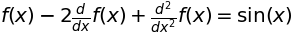

In [21]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

### Para encontrar la solución de una ODE, se puede utilizar la función dsolve 

# Ejercicio

### Hacer que el programa reciba mediante consola una ecuación diferencial y un valor x donde se evalúe la solución

In [28]:
expr = dsolve(diffeq, f(x)).rhs
expr
constantes = solve([expr.subs(x,0), expr.subs(x, math.pi/2) - 3]).rhs
constantes

AttributeError: 'dict' object has no attribute 'rhs'

In [ ]:
expr.subs(C:pi)

In [ ]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))